tensor(0.0044)


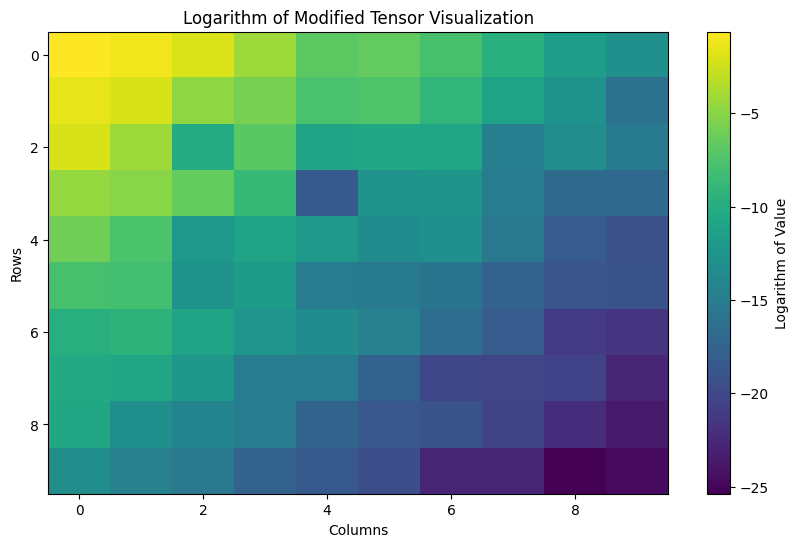

In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = 2.0


# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i * j)**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor_rand = torch.randn_like(tensor)


tensor *= tensor_rand

print(torch.sum(tensor_rand*tensor)/(torch.norm(tensor_rand)*torch.norm(tensor)))

# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

tensor_sub = tensor[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


tensor(0.8173)
tensor(0.0150)
tensor(0.9487)
tensor(0.1691)
tensor([1.0000, 1.0000, 1.0000,  ..., 0.4489, 0.4765, 0.4564])
tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])


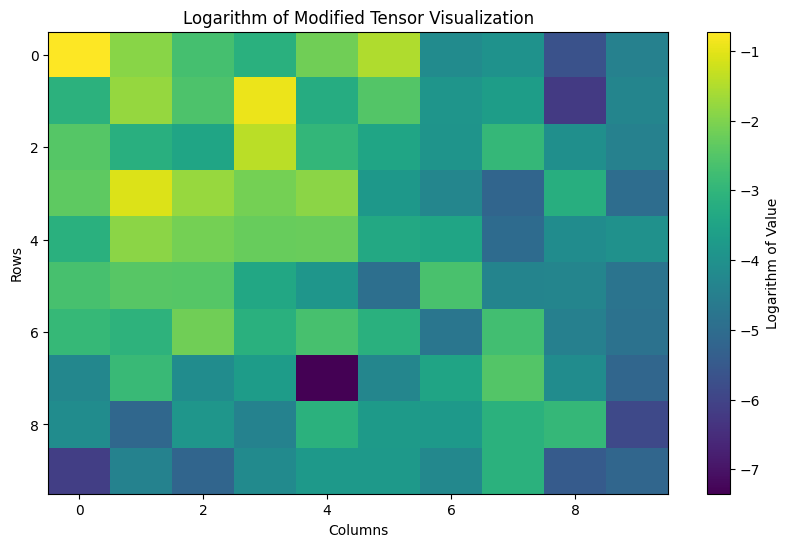

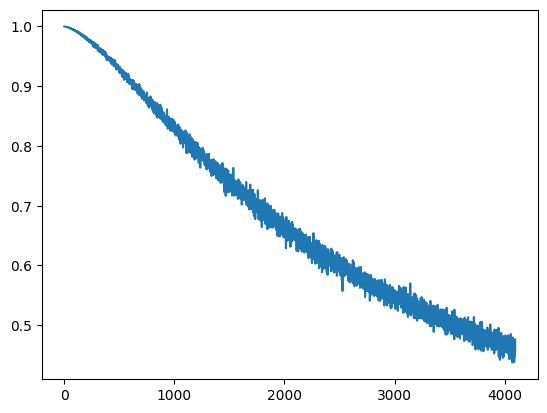

In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 2048

pow = .75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i * j)**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor_rand = torch.randn_like(tensor)


tensor *= tensor_rand


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

print(torch.sum(tensor_rand*tensor_muon)/(torch.norm(tensor_rand)*torch.norm(tensor_muon)))
print(torch.mean(torch.abs(tensor_muon))/torch.mean(torch.abs(tensor_rand)))
print(torch.sum(tensor_rand[:10, :10]*tensor_muon[:10, :10])/(torch.norm(tensor_rand[:10, :10])*torch.norm(tensor_muon[:10, :10])))
print(torch.mean(torch.abs(tensor_muon[:10, :10]))/torch.mean(torch.abs(tensor_rand[:10, :10])))

print(torch.linalg.norm(tensor_muon, dim=0))
print(torch.linalg.norm(tensor_muon, dim=1))

tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


# Plot torch.linalg.norm(tensor_muon, dim=0)

plt.plot(torch.linalg.norm(tensor_muon, dim=0))
plt.show()


tensor(0.8525)
tensor([0.9999, 0.9998, 0.9997,  ..., 0.4426, 0.4653, 0.4792])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.

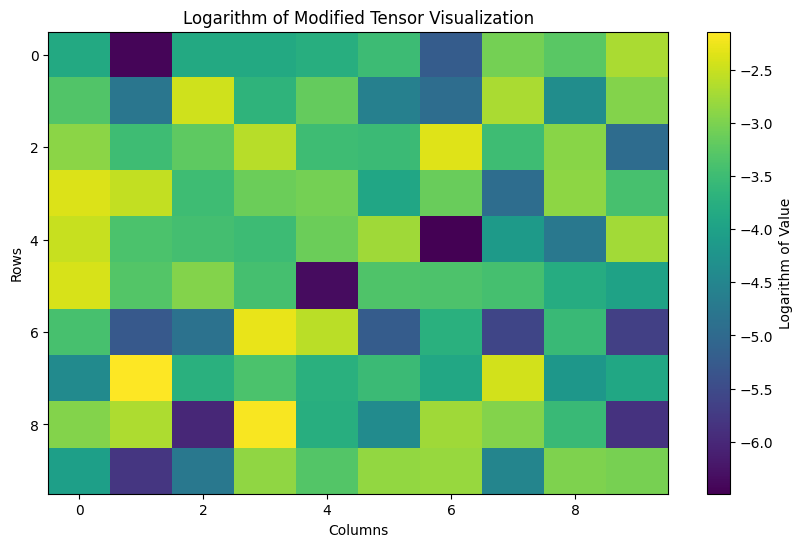

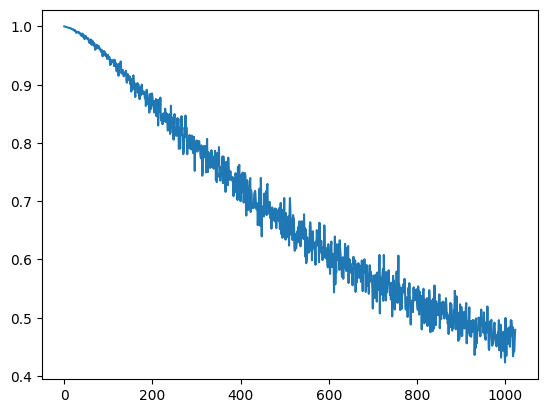

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = 0.75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (j)**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor_rand = torch.randn_like(tensor)

tensor *= tensor_rand


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

print(torch.sum(tensor_rand*tensor_muon)/(torch.norm(tensor_rand)*torch.norm(tensor_muon)))

print(torch.linalg.norm(tensor_muon, dim=0))
print(torch.linalg.norm(tensor_muon, dim=1))

tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

plt.plot(torch.linalg.norm(tensor_muon, dim=0))
plt.show()


tensor(0.8812)
tensor([0.9627, 0.9577, 0.9588,  ..., 0.4876, 0.4804, 0.4973])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.

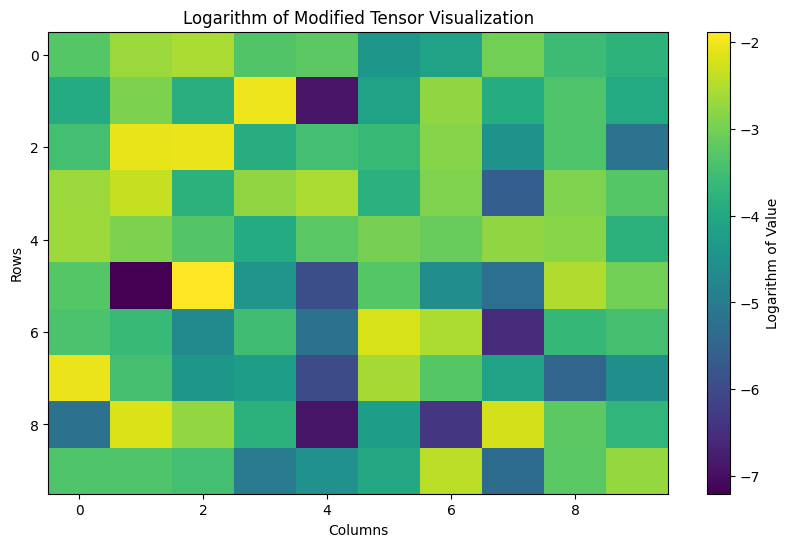

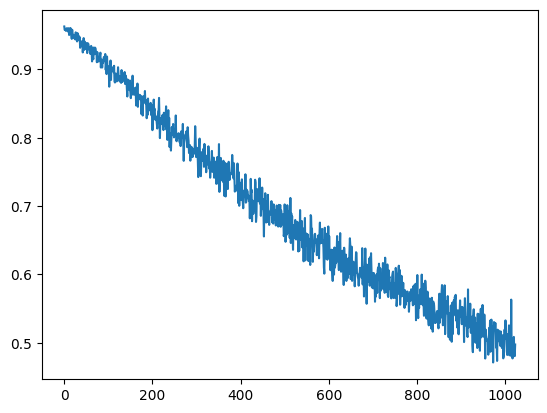

In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = 0.75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / ((i+100) * (j+100))**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor_rand = torch.randn_like(tensor)

tensor *= tensor_rand


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

print(torch.sum(tensor_rand*tensor_muon)/(torch.norm(tensor_rand)*torch.norm(tensor_muon)))

print(torch.linalg.norm(tensor_muon, dim=0))
print(torch.linalg.norm(tensor_muon, dim=1))

tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


# Plot torch.linalg.norm(tensor_muon, dim=0)

plt.plot(torch.linalg.norm(tensor_muon, dim=0))
plt.show()


tensor([0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500]) tensor([0.0995, 0.0963, 0.0955, 0.0693, 0.0439, 0.0552, 0.0705, 0.0670, 0.0556,
        0.0581, 0.0400, 0.0542, 0.0324, 0.0436, 0.0375, 0.0124, 0.0250, 0.0194,
        0.0096, 0.0149])


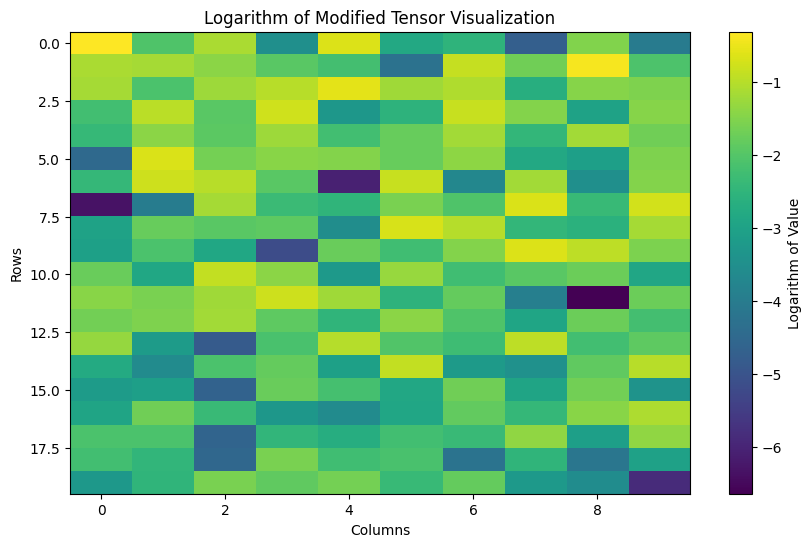

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 10
m = 20

pow = 1.0

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i * j)**pow for j in range(1, n + 1)] for i in range(1, m + 1)])

tensor *= torch.randn_like(tensor)


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < m]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

# tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]
tensor_sub = tensor_muon

print(torch.mean(tensor_sub**2, dim=0), torch.mean(tensor_sub**2, dim=1))

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [4]:
print(tensor_muon[0, 0]/tensor_muon[-1, -1])
print(tensor[0, 1]/tensor[-1, -1])
print(torch.abs(tensor[0, 1]/tensor[-1, -1])**.5)




tensor(20.0724)
tensor(10301.3301)
tensor(101.4955)


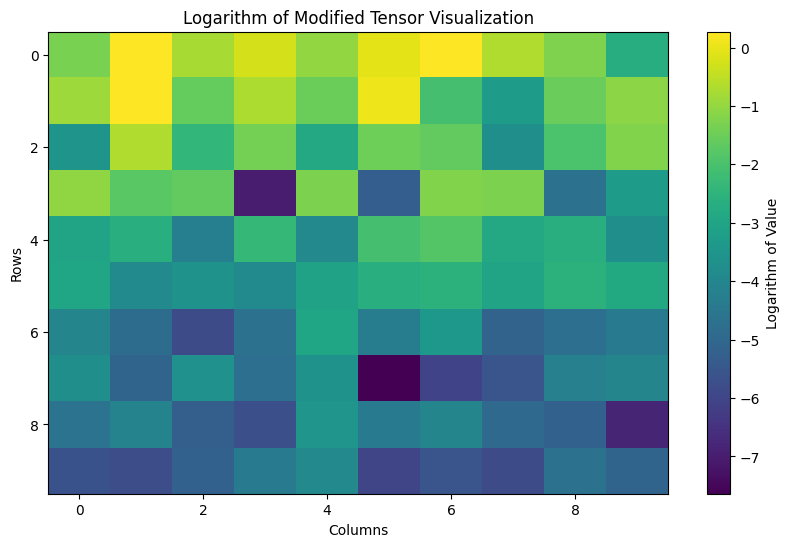

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = .75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i*(j**.1))**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor *= torch.randn_like(tensor)


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

tensor_sub = tensor[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


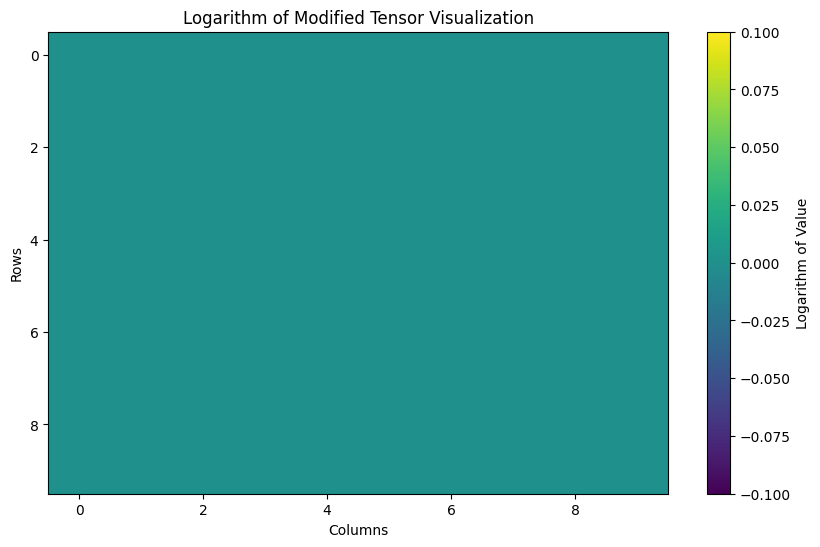

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = .75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i*(j**.1))**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor *= torch.randn_like(tensor)


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

tensor_sub = tensor[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(torch.sign(tensor_sub)))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


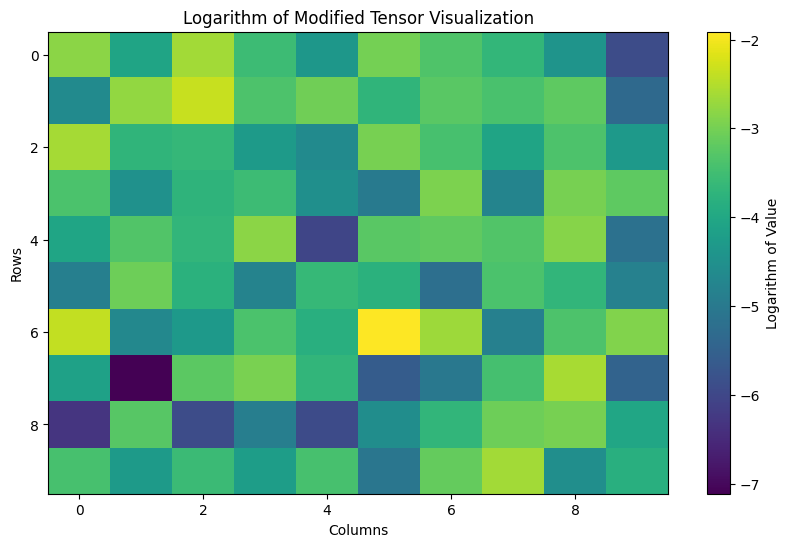

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = .75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i*(j**.1))**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor *= torch.randn_like(tensor)


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


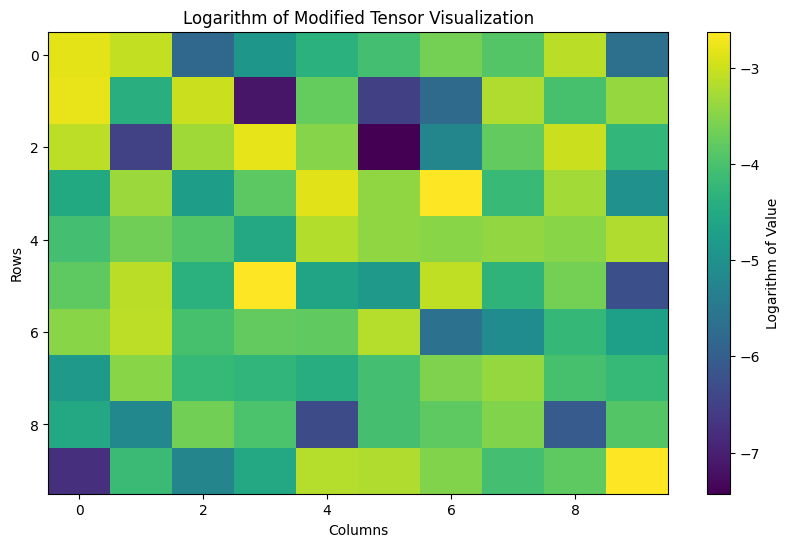

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = .75

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i*(j**.01))**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor *= torch.randn_like(tensor)


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
log_tensor = torch.log(torch.abs(tensor_sub))

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


tensor([[-0.0437, -0.0436,  0.0388,  ..., -0.0245,  0.0289, -0.0286],
        [-0.0359,  0.0324, -0.0437,  ..., -0.0454, -0.0332, -0.0320],
        [ 0.0390, -0.0339, -0.0556,  ..., -0.0484, -0.0284,  0.0488],
        ...,
        [ 0.0470,  0.0271, -0.0302,  ..., -0.0134,  0.0576, -0.0381],
        [-0.0384, -0.0510,  0.0457,  ...,  0.0161, -0.0264, -0.0147],
        [ 0.0312, -0.0246,  0.0140,  ..., -0.0314,  0.0423,  0.0118]])
tensor(0.0837) tensor(1.6652e-06)
tensor([1.6652e-06, 2.2873e-06, 2.5742e-06, 2.6710e-06, 3.4366e-06, 4.6603e-06,
        5.8822e-06, 5.9977e-06, 6.9961e-06, 7.2122e-06]) tensor([0.0774, 0.0775, 0.0790, 0.0791, 0.0804, 0.0808, 0.0811, 0.0813, 0.0837,
        0.0837])


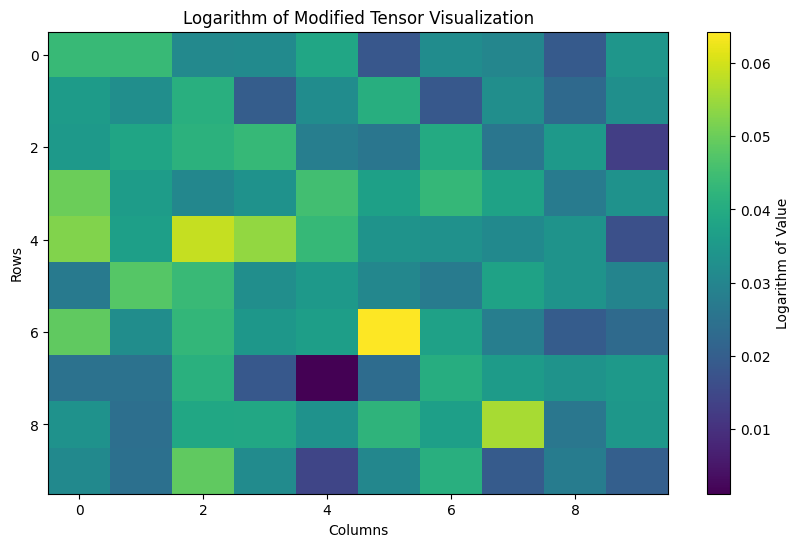

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
n = 512

pow = .1

# Create the n x 2n tensor
tensor = torch.tensor([[1 / (i*j)**pow for j in range(1, 2 * n + 1)] for i in range(1, n + 1)])

tensor *= torch.sign(torch.randn_like(tensor))


# Only plot some of the rows, cols, powers of 2
plot_indices1 = 2**torch.arange(0, 10, dtype=torch.int64)-1
plot_indices2 = 2**torch.arange(0, 10, dtype=torch.int64)-1

plot_indices1 = plot_indices1[plot_indices1 < n]
plot_indices2 = plot_indices2[plot_indices2 < 2*n]

U, S, Vt = torch.linalg.svd(tensor, full_matrices=False)

tensor_muon = U @ Vt

print(tensor_muon)
print(torch.max(torch.abs(tensor_muon)), torch.min(torch.abs(tensor_muon)))

tensor_muon_sorted = torch.sort(torch.abs(tensor_muon.view(-1)))[0]

print(tensor_muon_sorted[0:10], tensor_muon_sorted[-10:])

tensor_sub = tensor_muon[plot_indices1][:, plot_indices2]

# Take the logarithm of the tensor values
# log_tensor = torch.log(torch.abs(tensor_sub))
log_tensor = torch.abs(tensor_sub)

# Convert tensor to a numpy array for visualization
log_tensor_np = log_tensor.numpy()

# Plotting the logarithm of the tensor
plt.figure(figsize=(10, 6))
plt.imshow(log_tensor_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Logarithm of Value')
plt.title('Logarithm of Modified Tensor Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [10]:
print(512**.2)

3.482202253184497


In [11]:
def matrix_power_psd(matrix, power):
    """
    Compute the power of a PSD matrix using eigendecomposition.
    
    Args:
        matrix (torch.Tensor): The PSD matrix (n x n).
        power (float): The exponent to which the matrix is raised.
    
    Returns:
        torch.Tensor: The resulting matrix after raising to the specified power.
    """
    # Perform eigendecomposition
    eigenvalues, eigenvectors = torch.linalg.eigh(matrix)
    
    # Raise the eigenvalues to the specified power
    powered_eigenvalues = torch.diag(eigenvalues.clamp(min=0) ** power)
    
    # Reconstruct the matrix
    matrix_powered = eigenvectors @ powered_eigenvalues @ eigenvectors.T
    
    return matrix_powered

In [5]:
import torch

def zeropower_via_svd(G, steps=None):
    U, S, V = G.svd()
    return U @ V.T


def zeropower_via_newtonschulz5(G, steps=10, eps=1e-15):
    """
    Newton-Schulz iteration to compute the zeroth power / orthogonalization of G. We opt to use a
    quintic iteration whose coefficients are selected to maximize the slope at zero. For the purpose
    of minimizing steps, it turns out to be empirically effective to keep increasing the slope at
    zero even beyond the point where the iteration no longer converges all the way to one everywhere
    on the interval. This iteration therefore does not produce UV^T but rather something like US'V^T
    where S' is diagonal with S_{ii}' \sim Uniform(0.5, 1.5), which turns out not to hurt model
    performance at all relative to UV^T, where USV^T = G is the SVD.
    """
    assert len(G.shape) == 2
    a, b, c = (3.4445, -4.7750,  2.0315)
    X = G.bfloat16()
    X /= (X.norm() + eps) # ensure top singular value <= 1
    if G.size(0) > G.size(1):
        X = X.T
    for _ in range(steps):
        A = X @ X.T
        B = A @ X
        X = a * X + b * B + c * A @ B
    
    for _ in range(2):
        X = 1.5 * X - 0.5 * (X @ X.T) @ X    
        
    if G.size(0) > G.size(1):
        X = X.T
    return X

G = torch.randn(10, 15)

print(G.norm())

G = zeropower_via_newtonschulz5(G)

print(G.norm())

G /= torch.norm(G)
G *= min(10, 15)**.5

print(G.norm())

tensor(11.0081)
tensor(3.1250, dtype=torch.bfloat16)
tensor(3.1719, dtype=torch.bfloat16)
